## Importing python libraries

In [1]:
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


## Importing datset

In [4]:
raw_dataset= pd.read_csv('marketing_sample_for_walmart_com-product_details__20200101_20200331__30k_data.csv')
raw_dataset.head()

,Uniq Id,Crawl Timestamp,Product Url,Product Name,Description,List Price,Sale Price,Brand,Item Number,Gtin,Package Size,Category,Postal Code,Available
0,51b010b871cde349bd32159a1cc1a15f,2020-01-24 16:08:36 +0000,https://www.walmart.com/ip/Allegiance-Economy-...,Allegiance Economy Dual-scale Digital Thermometer,We aim to show you accurate product informati...,11.11,11.11,Cardinal Health,NaN,707389636164,NaN,Health | Medicine Cabinet | Thermometers | Dig...,NaN,True
1,d6a7f100e44a626a3701804e99236ad6,2020-01-24 15:54:21 +0000,https://www.walmart.com/ip/Kenneth-Cole-Reacti...,Kenneth Cole Reaction Eau De Parfum Spray For ...,We aim to show you accurate product informati...,23.99,23.99,Kenneth Cole,NaN,191565696101,NaN,Premium Beauty | Premium Fragrance | Premium P...,NaN,True
2,99d2b7da7e3e427a942f864937dacd9d,2020-01-24 18:34:28 +0000,https://www.walmart.com/ip/Kid-Tough-Fitness-I...,Kid Tough Fitness Inflatable Free-Standing Pun...,We aim to show you accurate product informati...,30.76,30.76,BONK FIT,563852139.0,855523007070,NaN,Sports & Outdoors | Outdoor Sports | Hunting |...,NaN,True
3,4c76d170c2c6a759cbce812d790a0b88,2020-01-24 11:08:53 +0000,https://www.walmart.com/ip/THE-FIRST-YEARS/167...,THE FIRST YEARS,We aim to show you accurate product informati...,6.99,6.99,The First Years,553299941.0,71463046263,NaN,Baby | Diapering | Baby Wipes,NaN,True
4,8ac95837dc8baa01e504fd8f633ffaf2,2020-03-10 07:37:21 +0000,https://www.walmart.com/ip/4-Pack-MD-USA-Seaml...,4 Pack - MD USA Seamless Toe-Wave-In Mesh Diab...,We aim to show you accurate product informatio...,28.27,28.27,MD USA,NaN,191897514500,NaN,Health | Diabetes Care | Diabetic Socks,NaN,True


In [5]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Uniq Id          30000 non-null  object 
 1   Crawl Timestamp  30000 non-null  object 
 2   Product Url      30000 non-null  object 
 3   Product Name     30000 non-null  object 
 4   Description      30000 non-null  object 
 5   List Price       30000 non-null  float64
 6   Sale Price       30000 non-null  float64
 7   Brand            29481 non-null  object 
 8   Item Number      8554 non-null   float64
 9   Gtin             30000 non-null  int64  
 10  Package Size     0 non-null      float64
 11  Category         29976 non-null  object 
 12  Postal Code      0 non-null      float64
 13  Available        30000 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(7)
memory usage: 3.0+ MB


## Performing Exploratory data analysis (EDA)

In [3]:
# Dropping unnecessary features 
raw_dataset.drop(['Uniq Id','Crawl Timestamp','List Price','Sale Price','Item Number','Gtin','Package Size','Postal Code','Available'], axis=1,inplace=True)

In [4]:
raw_dataset

,Product Url,Product Name,Description,Brand,Category
0,https://www.walmart.com/ip/Allegiance-Economy-...,Allegiance Economy Dual-scale Digital Thermometer,We aim to show you accurate product informati...,Cardinal Health,Health | Medicine Cabinet | Thermometers | Dig...
1,https://www.walmart.com/ip/Kenneth-Cole-Reacti...,Kenneth Cole Reaction Eau De Parfum Spray For ...,We aim to show you accurate product informati...,Kenneth Cole,Premium Beauty | Premium Fragrance | Premium P...
2,https://www.walmart.com/ip/Kid-Tough-Fitness-I...,Kid Tough Fitness Inflatable Free-Standing Pun...,We aim to show you accurate product informati...,BONK FIT,Sports & Outdoors | Outdoor Sports | Hunting |...
3,https://www.walmart.com/ip/THE-FIRST-YEARS/167...,THE FIRST YEARS,We aim to show you accurate product informati...,The First Years,Baby | Diapering | Baby Wipes
4,https://www.walmart.com/ip/4-Pack-MD-USA-Seaml...,4 Pack - MD USA Seamless Toe-Wave-In Mesh Diab...,We aim to show you accurate product informatio...,MD USA,Health | Diabetes Care | Diabetic Socks
...,...,...,...,...,...
29995,https://www.walmart.com/ip/Inside-Groin-Cup-wi...,Inside Groin Cup with Supporter,We aim to show you accurate product informati...,Ace Martial Arts Supply,Sports & Outdoors | Sports | Baseball Gear & E...
29996,https://www.walmart.com/ip/Tone-Brothers-Drome...,"Tone Brothers Dromedary Pimientos, 2 oz",We aim to show you accurate product informatio...,Dromedary,"Food | Meal Solutions, Grains & Pasta | Canned..."
29997,https://www.walmart.com/ip/Brittanies-Thyme-24...,Brittanies Thyme 242091 16 oz Organic Olive Oi...,We aim to show you accurate product informatio...,BRITTANIES THYME,Personal Care | Bath & Body | Hand Soaps
29998,https://www.walmart.com/ip/30-Foot-Round-Bould...,30-Foot Round Boulder Swirl Unibead Above Grou...,We aim to show you accurate product informati...,SmartLine,Toys | Outdoor Play | Swimming Pools & Spas | ...


In [5]:
raw_dataset['Category'].unique()

array(['Health | Medicine Cabinet | Thermometers | Digital Thermometers',
       'Premium Beauty | Premium Fragrance | Premium Perfume',
       'Sports & Outdoors | Outdoor Sports | Hunting | Hunting Clothing | All Hunting Clothing',
       ...,
       'Sports & Outdoors | Outdoor Sports | Hunting | Game Calls | Predator Calls',
       'Food | Beverages | Hot Cocoa | Specialty',
       'Sports & Outdoors | Outdoor Sports | The Realtree Shop | Mens Realtree Apparel | Mens Realtree Jackets & Vests'],
      dtype=object)

In [6]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Url   30000 non-null  object
 1   Product Name  30000 non-null  object
 2   Description   30000 non-null  object
 3   Brand         29481 non-null  object
 4   Category      29976 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [7]:
raw_dataset['Category'].isnull().sum()

24

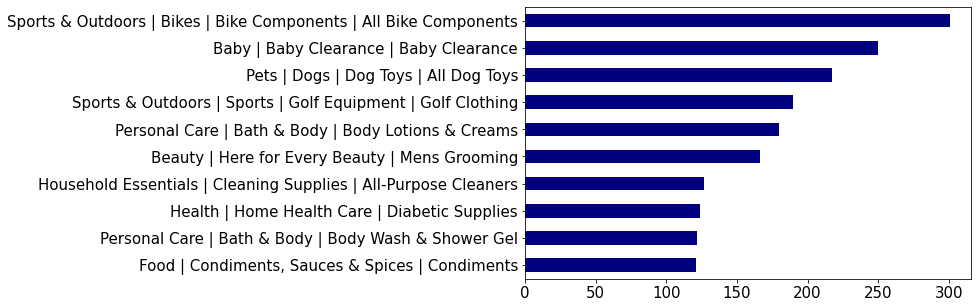

In [8]:
raw_dataset['Category'].value_counts()[0:10].plot(kind='barh',figsize=[8,5],fontsize=15,color='navy').invert_yaxis()

In [9]:
raw_dataset.isna().sum()

Product Url       0
Product Name      0
Description       0
Brand           519
Category         24
dtype: int64

In [10]:
raw_dataset.dropna(inplace=True)        #droppping nan values from dataset

In [11]:
raw_dataset.isnull().sum()         #checking wether any nan value present in dataset or not  

Product Url     0
Product Name    0
Description     0
Brand           0
Category        0
dtype: int64

In [12]:
raw_dataset.duplicated().sum()

0

In [13]:
raw_dataset['Category'][0]

'Health | Medicine Cabinet | Thermometers | Digital Thermometers'

In [14]:
#we have to remove the straight line between names

In [15]:
raw_dataset['Category']=raw_dataset['Category'].str.replace('|','')

<ipython-input-15-3a7375dc67c5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  raw_dataset['Category']=raw_dataset['Category'].str.replace('|','')


In [16]:
raw_dataset['Brand']=raw_dataset['Brand'].str.replace(' ','')

In [17]:
raw_dataset

,Product Url,Product Name,Description,Brand,Category
0,https://www.walmart.com/ip/Allegiance-Economy-...,Allegiance Economy Dual-scale Digital Thermometer,We aim to show you accurate product informati...,CardinalHealth,Health Medicine Cabinet Thermometers Digita...
1,https://www.walmart.com/ip/Kenneth-Cole-Reacti...,Kenneth Cole Reaction Eau De Parfum Spray For ...,We aim to show you accurate product informati...,KennethCole,Premium Beauty Premium Fragrance Premium Per...
2,https://www.walmart.com/ip/Kid-Tough-Fitness-I...,Kid Tough Fitness Inflatable Free-Standing Pun...,We aim to show you accurate product informati...,BONKFIT,Sports & Outdoors Outdoor Sports Hunting Hu...
3,https://www.walmart.com/ip/THE-FIRST-YEARS/167...,THE FIRST YEARS,We aim to show you accurate product informati...,TheFirstYears,Baby Diapering Baby Wipes
4,https://www.walmart.com/ip/4-Pack-MD-USA-Seaml...,4 Pack - MD USA Seamless Toe-Wave-In Mesh Diab...,We aim to show you accurate product informatio...,MDUSA,Health Diabetes Care Diabetic Socks
...,...,...,...,...,...
29995,https://www.walmart.com/ip/Inside-Groin-Cup-wi...,Inside Groin Cup with Supporter,We aim to show you accurate product informati...,AceMartialArtsSupply,Sports & Outdoors Sports Baseball Gear & Equ...
29996,https://www.walmart.com/ip/Tone-Brothers-Drome...,"Tone Brothers Dromedary Pimientos, 2 oz",We aim to show you accurate product informatio...,Dromedary,"Food Meal Solutions, Grains & Pasta Canned G..."
29997,https://www.walmart.com/ip/Brittanies-Thyme-24...,Brittanies Thyme 242091 16 oz Organic Olive Oi...,We aim to show you accurate product informatio...,BRITTANIESTHYME,Personal Care Bath & Body Hand Soaps
29998,https://www.walmart.com/ip/30-Foot-Round-Bould...,30-Foot Round Boulder Swirl Unibead Above Grou...,We aim to show you accurate product informati...,SmartLine,Toys Outdoor Play Swimming Pools & Spas Poo...


In [18]:
raw_dataset['Category']=raw_dataset['Category'].str.replace('&','')

In [19]:
raw_dataset['Category']=raw_dataset['Category'].apply(lambda x:x.split())

In [20]:
raw_dataset

,Product Url,Product Name,Description,Brand,Category
0,https://www.walmart.com/ip/Allegiance-Economy-...,Allegiance Economy Dual-scale Digital Thermometer,We aim to show you accurate product informati...,CardinalHealth,"[Health, Medicine, Cabinet, Thermometers, Digi..."
1,https://www.walmart.com/ip/Kenneth-Cole-Reacti...,Kenneth Cole Reaction Eau De Parfum Spray For ...,We aim to show you accurate product informati...,KennethCole,"[Premium, Beauty, Premium, Fragrance, Premium,..."
2,https://www.walmart.com/ip/Kid-Tough-Fitness-I...,Kid Tough Fitness Inflatable Free-Standing Pun...,We aim to show you accurate product informati...,BONKFIT,"[Sports, Outdoors, Outdoor, Sports, Hunting, H..."
3,https://www.walmart.com/ip/THE-FIRST-YEARS/167...,THE FIRST YEARS,We aim to show you accurate product informati...,TheFirstYears,"[Baby, Diapering, Baby, Wipes]"
4,https://www.walmart.com/ip/4-Pack-MD-USA-Seaml...,4 Pack - MD USA Seamless Toe-Wave-In Mesh Diab...,We aim to show you accurate product informatio...,MDUSA,"[Health, Diabetes, Care, Diabetic, Socks]"
...,...,...,...,...,...
29995,https://www.walmart.com/ip/Inside-Groin-Cup-wi...,Inside Groin Cup with Supporter,We aim to show you accurate product informati...,AceMartialArtsSupply,"[Sports, Outdoors, Sports, Baseball, Gear, Equ..."
29996,https://www.walmart.com/ip/Tone-Brothers-Drome...,"Tone Brothers Dromedary Pimientos, 2 oz",We aim to show you accurate product informatio...,Dromedary,"[Food, Meal, Solutions,, Grains, Pasta, Canned..."
29997,https://www.walmart.com/ip/Brittanies-Thyme-24...,Brittanies Thyme 242091 16 oz Organic Olive Oi...,We aim to show you accurate product informatio...,BRITTANIESTHYME,"[Personal, Care, Bath, Body, Hand, Soaps]"
29998,https://www.walmart.com/ip/30-Foot-Round-Bould...,30-Foot Round Boulder Swirl Unibead Above Grou...,We aim to show you accurate product informati...,SmartLine,"[Toys, Outdoor, Play, Swimming, Pools, Spas, P..."


In [21]:
raw_dataset['Description']=raw_dataset['Description'].str.replace('We aim to show you accurate product information. Manufacturers, suppliers and others provide what you see here, and we have not verified it. See our disclaimer |','')

<ipython-input-21-3ee783857e1d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  raw_dataset['Description']=raw_dataset['Description'].str.replace('We aim to show you accurate product information. Manufacturers, suppliers and others provide what you see here, and we have not verified it. See our disclaimer |','')


In [22]:
raw_dataset

,Product Url,Product Name,Description,Brand,Category
0,https://www.walmart.com/ip/Allegiance-Economy-...,Allegiance Economy Dual-scale Digital Thermometer,|Part #5516811EDS - Allegiance Economy Dual-S...,CardinalHealth,"[Health, Medicine, Cabinet, Thermometers, Digi..."
1,https://www.walmart.com/ip/Kenneth-Cole-Reacti...,Kenneth Cole Reaction Eau De Parfum Spray For ...,|Kenneth Cole Reaction perfume for her captur...,KennethCole,"[Premium, Beauty, Premium, Fragrance, Premium,..."
2,https://www.walmart.com/ip/Kid-Tough-Fitness-I...,Kid Tough Fitness Inflatable Free-Standing Pun...,|Bonk Fit is the inflatable punching bag you ...,BONKFIT,"[Sports, Outdoors, Outdoor, Sports, Hunting, H..."
3,https://www.walmart.com/ip/THE-FIRST-YEARS/167...,THE FIRST YEARS,| The First Years Soothing Breast Wipes are d...,TheFirstYears,"[Baby, Diapering, Baby, Wipes]"
4,https://www.walmart.com/ip/4-Pack-MD-USA-Seaml...,4 Pack - MD USA Seamless Toe-Wave-In Mesh Diab...,| Pack of 4 for the UPC: 818286010053 Product ...,MDUSA,"[Health, Diabetes, Care, Diabetic, Socks]"
...,...,...,...,...,...
29995,https://www.walmart.com/ip/Inside-Groin-Cup-wi...,Inside Groin Cup with Supporter,|Inside Groin Cup with Supporter Inside Gro...,AceMartialArtsSupply,"[Sports, Outdoors, Sports, Baseball, Gear, Equ..."
29996,https://www.walmart.com/ip/Tone-Brothers-Drome...,"Tone Brothers Dromedary Pimientos, 2 oz","|Pimientos, Sliced 2 oz (57 g) To Store After ...",Dromedary,"[Food, Meal, Solutions,, Grains, Pasta, Canned..."
29997,https://www.walmart.com/ip/Brittanies-Thyme-24...,Brittanies Thyme 242091 16 oz Organic Olive Oi...,| Luxurious olive oil and coconut oil provide ...,BRITTANIESTHYME,"[Personal, Care, Bath, Body, Hand, Soaps]"
29998,https://www.walmart.com/ip/30-Foot-Round-Bould...,30-Foot Round Boulder Swirl Unibead Above Grou...,| The Unibead connection is designed to opera...,SmartLine,"[Toys, Outdoor, Play, Swimming, Pools, Spas, P..."


In [23]:
raw_dataset.iloc[1]['Category']

['Premium', 'Beauty', 'Premium', 'Fragrance', 'Premium', 'Perfume']

In [24]:
raw_dataset['Brand'].value_counts()

UniqueBargains    338
Generic           310
Anself            230
Nike              130
UnderArmour       106
                 ... 
Flonase             1
MalibuC             1
River2Sea           1
WeThePeople         1
PantherMartin       1
Name: Brand, Length: 11340, dtype: int64

In [25]:
raw_dataset['Description']=raw_dataset['Description'].apply(lambda x:x.split())


In [26]:
raw_dataset

,Product Url,Product Name,Description,Brand,Category
0,https://www.walmart.com/ip/Allegiance-Economy-...,Allegiance Economy Dual-scale Digital Thermometer,"[|Part, #5516811EDS, -, Allegiance, Economy, D...",CardinalHealth,"[Health, Medicine, Cabinet, Thermometers, Digi..."
1,https://www.walmart.com/ip/Kenneth-Cole-Reacti...,Kenneth Cole Reaction Eau De Parfum Spray For ...,"[|Kenneth, Cole, Reaction, perfume, for, her, ...",KennethCole,"[Premium, Beauty, Premium, Fragrance, Premium,..."
2,https://www.walmart.com/ip/Kid-Tough-Fitness-I...,Kid Tough Fitness Inflatable Free-Standing Pun...,"[|Bonk, Fit, is, the, inflatable, punching, ba...",BONKFIT,"[Sports, Outdoors, Outdoor, Sports, Hunting, H..."
3,https://www.walmart.com/ip/THE-FIRST-YEARS/167...,THE FIRST YEARS,"[|, The, First, Years, Soothing, Breast, Wipes...",TheFirstYears,"[Baby, Diapering, Baby, Wipes]"
4,https://www.walmart.com/ip/4-Pack-MD-USA-Seaml...,4 Pack - MD USA Seamless Toe-Wave-In Mesh Diab...,"[|, Pack, of, 4, for, the, UPC:, 818286010053,...",MDUSA,"[Health, Diabetes, Care, Diabetic, Socks]"
...,...,...,...,...,...
29995,https://www.walmart.com/ip/Inside-Groin-Cup-wi...,Inside Groin Cup with Supporter,"[|Inside, Groin, Cup, with, Supporter, Inside,...",AceMartialArtsSupply,"[Sports, Outdoors, Sports, Baseball, Gear, Equ..."
29996,https://www.walmart.com/ip/Tone-Brothers-Drome...,"Tone Brothers Dromedary Pimientos, 2 oz","[|Pimientos,, Sliced, 2, oz, (57, g), To, Stor...",Dromedary,"[Food, Meal, Solutions,, Grains, Pasta, Canned..."
29997,https://www.walmart.com/ip/Brittanies-Thyme-24...,Brittanies Thyme 242091 16 oz Organic Olive Oi...,"[|, Luxurious, olive, oil, and, coconut, oil, ...",BRITTANIESTHYME,"[Personal, Care, Bath, Body, Hand, Soaps]"
29998,https://www.walmart.com/ip/30-Foot-Round-Bould...,30-Foot Round Boulder Swirl Unibead Above Grou...,"[|, The, Unibead, connection, is, designed, to...",SmartLine,"[Toys, Outdoor, Play, Swimming, Pools, Spas, P..."


In [27]:
raw_dataset['Brand']=raw_dataset['Brand'].apply(lambda x:x.split())


In [28]:
raw_dataset

,Product Url,Product Name,Description,Brand,Category
0,https://www.walmart.com/ip/Allegiance-Economy-...,Allegiance Economy Dual-scale Digital Thermometer,"[|Part, #5516811EDS, -, Allegiance, Economy, D...",[CardinalHealth],"[Health, Medicine, Cabinet, Thermometers, Digi..."
1,https://www.walmart.com/ip/Kenneth-Cole-Reacti...,Kenneth Cole Reaction Eau De Parfum Spray For ...,"[|Kenneth, Cole, Reaction, perfume, for, her, ...",[KennethCole],"[Premium, Beauty, Premium, Fragrance, Premium,..."
2,https://www.walmart.com/ip/Kid-Tough-Fitness-I...,Kid Tough Fitness Inflatable Free-Standing Pun...,"[|Bonk, Fit, is, the, inflatable, punching, ba...",[BONKFIT],"[Sports, Outdoors, Outdoor, Sports, Hunting, H..."
3,https://www.walmart.com/ip/THE-FIRST-YEARS/167...,THE FIRST YEARS,"[|, The, First, Years, Soothing, Breast, Wipes...",[TheFirstYears],"[Baby, Diapering, Baby, Wipes]"
4,https://www.walmart.com/ip/4-Pack-MD-USA-Seaml...,4 Pack - MD USA Seamless Toe-Wave-In Mesh Diab...,"[|, Pack, of, 4, for, the, UPC:, 818286010053,...",[MDUSA],"[Health, Diabetes, Care, Diabetic, Socks]"
...,...,...,...,...,...
29995,https://www.walmart.com/ip/Inside-Groin-Cup-wi...,Inside Groin Cup with Supporter,"[|Inside, Groin, Cup, with, Supporter, Inside,...",[AceMartialArtsSupply],"[Sports, Outdoors, Sports, Baseball, Gear, Equ..."
29996,https://www.walmart.com/ip/Tone-Brothers-Drome...,"Tone Brothers Dromedary Pimientos, 2 oz","[|Pimientos,, Sliced, 2, oz, (57, g), To, Stor...",[Dromedary],"[Food, Meal, Solutions,, Grains, Pasta, Canned..."
29997,https://www.walmart.com/ip/Brittanies-Thyme-24...,Brittanies Thyme 242091 16 oz Organic Olive Oi...,"[|, Luxurious, olive, oil, and, coconut, oil, ...",[BRITTANIESTHYME],"[Personal, Care, Bath, Body, Hand, Soaps]"
29998,https://www.walmart.com/ip/30-Foot-Round-Bould...,30-Foot Round Boulder Swirl Unibead Above Grou...,"[|, The, Unibead, connection, is, designed, to...",[SmartLine],"[Toys, Outdoor, Play, Swimming, Pools, Spas, P..."


In [29]:
raw_dataset['tags']=raw_dataset['Category']+raw_dataset['Brand']         #creating new column tags for bag of words 

In [30]:
raw_dataset

,Product Url,Product Name,Description,Brand,Category,tags
0,https://www.walmart.com/ip/Allegiance-Economy-...,Allegiance Economy Dual-scale Digital Thermometer,"[|Part, #5516811EDS, -, Allegiance, Economy, D...",[CardinalHealth],"[Health, Medicine, Cabinet, Thermometers, Digi...","[Health, Medicine, Cabinet, Thermometers, Digi..."
1,https://www.walmart.com/ip/Kenneth-Cole-Reacti...,Kenneth Cole Reaction Eau De Parfum Spray For ...,"[|Kenneth, Cole, Reaction, perfume, for, her, ...",[KennethCole],"[Premium, Beauty, Premium, Fragrance, Premium,...","[Premium, Beauty, Premium, Fragrance, Premium,..."
2,https://www.walmart.com/ip/Kid-Tough-Fitness-I...,Kid Tough Fitness Inflatable Free-Standing Pun...,"[|Bonk, Fit, is, the, inflatable, punching, ba...",[BONKFIT],"[Sports, Outdoors, Outdoor, Sports, Hunting, H...","[Sports, Outdoors, Outdoor, Sports, Hunting, H..."
3,https://www.walmart.com/ip/THE-FIRST-YEARS/167...,THE FIRST YEARS,"[|, The, First, Years, Soothing, Breast, Wipes...",[TheFirstYears],"[Baby, Diapering, Baby, Wipes]","[Baby, Diapering, Baby, Wipes, TheFirstYears]"
4,https://www.walmart.com/ip/4-Pack-MD-USA-Seaml...,4 Pack - MD USA Seamless Toe-Wave-In Mesh Diab...,"[|, Pack, of, 4, for, the, UPC:, 818286010053,...",[MDUSA],"[Health, Diabetes, Care, Diabetic, Socks]","[Health, Diabetes, Care, Diabetic, Socks, MDUSA]"
...,...,...,...,...,...,...
29995,https://www.walmart.com/ip/Inside-Groin-Cup-wi...,Inside Groin Cup with Supporter,"[|Inside, Groin, Cup, with, Supporter, Inside,...",[AceMartialArtsSupply],"[Sports, Outdoors, Sports, Baseball, Gear, Equ...","[Sports, Outdoors, Sports, Baseball, Gear, Equ..."
29996,https://www.walmart.com/ip/Tone-Brothers-Drome...,"Tone Brothers Dromedary Pimientos, 2 oz","[|Pimientos,, Sliced, 2, oz, (57, g), To, Stor...",[Dromedary],"[Food, Meal, Solutions,, Grains, Pasta, Canned...","[Food, Meal, Solutions,, Grains, Pasta, Canned..."
29997,https://www.walmart.com/ip/Brittanies-Thyme-24...,Brittanies Thyme 242091 16 oz Organic Olive Oi...,"[|, Luxurious, olive, oil, and, coconut, oil, ...",[BRITTANIESTHYME],"[Personal, Care, Bath, Body, Hand, Soaps]","[Personal, Care, Bath, Body, Hand, Soaps, BRIT..."
29998,https://www.walmart.com/ip/30-Foot-Round-Bould...,30-Foot Round Boulder Swirl Unibead Above Grou...,"[|, The, Unibead, connection, is, designed, to...",[SmartLine],"[Toys, Outdoor, Play, Swimming, Pools, Spas, P...","[Toys, Outdoor, Play, Swimming, Pools, Spas, P..."


In [31]:
raw_dataset.iloc[0]['tags']

['Health',
 'Medicine',
 'Cabinet',
 'Thermometers',
 'Digital',
 'Thermometers',
 'CardinalHealth']

In [32]:
processed_data=raw_dataset[['Product Url','Product Name','tags']]                #creating new datframe for model building

In [33]:
processed_data['tags']=processed_data['tags'].apply(lambda x:' '.join(x))

<ipython-input-33-c55c5df069d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data['tags']=processed_data['tags'].apply(lambda x:' '.join(x))


In [34]:
processed_data

,Product Url,Product Name,tags
0,https://www.walmart.com/ip/Allegiance-Economy-...,Allegiance Economy Dual-scale Digital Thermometer,Health Medicine Cabinet Thermometers Digital T...
1,https://www.walmart.com/ip/Kenneth-Cole-Reacti...,Kenneth Cole Reaction Eau De Parfum Spray For ...,Premium Beauty Premium Fragrance Premium Perfu...
2,https://www.walmart.com/ip/Kid-Tough-Fitness-I...,Kid Tough Fitness Inflatable Free-Standing Pun...,Sports Outdoors Outdoor Sports Hunting Hunting...
3,https://www.walmart.com/ip/THE-FIRST-YEARS/167...,THE FIRST YEARS,Baby Diapering Baby Wipes TheFirstYears
4,https://www.walmart.com/ip/4-Pack-MD-USA-Seaml...,4 Pack - MD USA Seamless Toe-Wave-In Mesh Diab...,Health Diabetes Care Diabetic Socks MDUSA
...,...,...,...
29995,https://www.walmart.com/ip/Inside-Groin-Cup-wi...,Inside Groin Cup with Supporter,Sports Outdoors Sports Baseball Gear Equipment...
29996,https://www.walmart.com/ip/Tone-Brothers-Drome...,"Tone Brothers Dromedary Pimientos, 2 oz","Food Meal Solutions, Grains Pasta Canned Goods..."
29997,https://www.walmart.com/ip/Brittanies-Thyme-24...,Brittanies Thyme 242091 16 oz Organic Olive Oi...,Personal Care Bath Body Hand Soaps BRITTANIEST...
29998,https://www.walmart.com/ip/30-Foot-Round-Bould...,30-Foot Round Boulder Swirl Unibead Above Grou...,Toys Outdoor Play Swimming Pools Spas Pool Sup...


In [35]:
processed_data['tags']=processed_data['tags'].apply(lambda x:x.lower())

<ipython-input-35-20a052ac0f1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data['tags']=processed_data['tags'].apply(lambda x:x.lower())


In [36]:
processed_data

,Product Url,Product Name,tags
0,https://www.walmart.com/ip/Allegiance-Economy-...,Allegiance Economy Dual-scale Digital Thermometer,health medicine cabinet thermometers digital t...
1,https://www.walmart.com/ip/Kenneth-Cole-Reacti...,Kenneth Cole Reaction Eau De Parfum Spray For ...,premium beauty premium fragrance premium perfu...
2,https://www.walmart.com/ip/Kid-Tough-Fitness-I...,Kid Tough Fitness Inflatable Free-Standing Pun...,sports outdoors outdoor sports hunting hunting...
3,https://www.walmart.com/ip/THE-FIRST-YEARS/167...,THE FIRST YEARS,baby diapering baby wipes thefirstyears
4,https://www.walmart.com/ip/4-Pack-MD-USA-Seaml...,4 Pack - MD USA Seamless Toe-Wave-In Mesh Diab...,health diabetes care diabetic socks mdusa
...,...,...,...
29995,https://www.walmart.com/ip/Inside-Groin-Cup-wi...,Inside Groin Cup with Supporter,sports outdoors sports baseball gear equipment...
29996,https://www.walmart.com/ip/Tone-Brothers-Drome...,"Tone Brothers Dromedary Pimientos, 2 oz","food meal solutions, grains pasta canned goods..."
29997,https://www.walmart.com/ip/Brittanies-Thyme-24...,Brittanies Thyme 242091 16 oz Organic Olive Oi...,personal care bath body hand soaps brittaniest...
29998,https://www.walmart.com/ip/30-Foot-Round-Bould...,30-Foot Round Boulder Swirl Unibead Above Grou...,toys outdoor play swimming pools spas pool sup...


In [37]:
processed_data.rename({'Product Name':'Product_Name'},axis=1,inplace=True)

C:\Users\shri\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [38]:
processed_data

,Product Url,Product_Name,tags
0,https://www.walmart.com/ip/Allegiance-Economy-...,Allegiance Economy Dual-scale Digital Thermometer,health medicine cabinet thermometers digital t...
1,https://www.walmart.com/ip/Kenneth-Cole-Reacti...,Kenneth Cole Reaction Eau De Parfum Spray For ...,premium beauty premium fragrance premium perfu...
2,https://www.walmart.com/ip/Kid-Tough-Fitness-I...,Kid Tough Fitness Inflatable Free-Standing Pun...,sports outdoors outdoor sports hunting hunting...
3,https://www.walmart.com/ip/THE-FIRST-YEARS/167...,THE FIRST YEARS,baby diapering baby wipes thefirstyears
4,https://www.walmart.com/ip/4-Pack-MD-USA-Seaml...,4 Pack - MD USA Seamless Toe-Wave-In Mesh Diab...,health diabetes care diabetic socks mdusa
...,...,...,...
29995,https://www.walmart.com/ip/Inside-Groin-Cup-wi...,Inside Groin Cup with Supporter,sports outdoors sports baseball gear equipment...
29996,https://www.walmart.com/ip/Tone-Brothers-Drome...,"Tone Brothers Dromedary Pimientos, 2 oz","food meal solutions, grains pasta canned goods..."
29997,https://www.walmart.com/ip/Brittanies-Thyme-24...,Brittanies Thyme 242091 16 oz Organic Olive Oi...,personal care bath body hand soaps brittaniest...
29998,https://www.walmart.com/ip/30-Foot-Round-Bould...,30-Foot Round Boulder Swirl Unibead Above Grou...,toys outdoor play swimming pools spas pool sup...


In [39]:
import nltk                                    # Importing libriaray
from nltk.stem.porter import PorterStemmer     # Importing model
ps=PorterStemmer()                             # Assigning the model 
def stem(text):                                # Creating function for removing ing ed tensed words
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
processed_data['tags']=processed_data['tags'].apply(stem)

In [ ]:
processed_data['tags']

In [40]:
#converting the data to the feature vectors 
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2000,stop_words='english')

In [41]:
vectors=cv.fit_transform(processed_data['tags']).toarray()

In [42]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
cv.get_feature_names()

['12',
 '20',
 '2011',
 '3drose',
 '3g',
 '3m',
 '900global',
 '9v',
 'aa',
 'aaa',
 'ab',
 'abdominal',
 'abugarcia',
 'accessories',
 'accu',
 'ace',
 'acemartialartssupply',
 'acid',
 'acne',
 'act',
 'action',
 'activewear',
 'activities',
 'activity',
 'aden',
 'adidas',
 'adult',
 'advil',
 'aftershaves',
 'age',
 'agptek',
 'aid',
 'aids',
 'air',
 'airhead',
 'airsoft',
 'airwick',
 'akoada',
 'akoyovwerve',
 'albabotanica',
 'alcoholic',
 'alka',
 'allencompany',
 'allergy',
 'allesonathletic',
 'alltopbargains',
 'almond',
 'alternatives',
 'altoids',
 'amazingforless',
 'ambesonne',
 'americanbabycompany',
 'ammunition',
 'amos',
 'anais',
 'anauto',
 'andalounaturals',
 'andis',
 'angeles',
 'animals',
 'ankle',
 'anself',
 'antacid',
 'antibiotics',
 'antidiarrheals',
 'antiperspirant',
 'antiperspirants',
 'antiseptics',
 'anyray',
 'aoolive',
 'apontus',
 'apparel',
 'appliances',
 'aqua',
 'aquasphere',
 'arcade',
 'arch',
 'archery',
 'archive',
 'area',
 'arm',
 'armo

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer=TfidfVectorizer()

In [ ]:
feature_vectors=vectorizer.fit_transform(processed_data['tags'])

In [ ]:
print(feature_vectors)

In [44]:
from sklearn.metrics.pairwise import cosine_similarity


In [45]:
similarity=cosine_similarity(vectors)

In [ ]:
similarity[1]

In [46]:
def recommend (product):
    product_index= processed_data[processed_data['Product_Name']==product].index[0]
    distances= similarity[product_index]
    product_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in product_list:
        print(processed_data.iloc[i[0]].Product_Name)

In [ ]:
processed_data[processed_data['Product_Name']=='Fetch Pet Hatchables Chameleon Dog Toy'].index[0]

In [ ]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

In [47]:
recommend('Berkley PowerBait Glitter Chroma-Glow Dough Fishing Bait')

Baitmate Live Bass Dip Jar #552, Fish Attractant for Lures and Bait
Grime Boss Fishing Wipes 24ct
bait aerator 4 pc carded pack
Mikes Glo Scent Bait Oil
Mikes Red UV-Glo Salmon Eggs Trout Bait 1.1 oz. Jar


In [ ]:
processed_data.iloc[5399].tags

In [ ]:
processed_data.iloc[3419].tags

In [ ]:
#sorting the products based on their similiraty score
sorted_similiar_product=  